# MBA em Ciência de Dados
# Técnicas Avançadas de Captura e Tratamento de Dados

### <span style="color:darkred">Módulo II - Tratamento de Dados</span>


### <span style="color:darkred">Avaliação</span>

Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos


---

#### <font color='red'> As respostas devem ser fornecidas no Moodle. O notebook é apenas para a implementação dos códigos que fornecerão as respostas</font>
---


In [71]:
# carregando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.svm import SVC
from sklearn.linear_model import Ridge
from sklearn import metrics

# carregando dados
data_orig = pd.read_csv("pib_mba_avaliacao.csv")

Vamos utilizar uma base de dados baixada do IBGE com o PIB per capita para cada município brasileiro, essa base foi modificada para o propósito dos exercícios abaixo. Essa base possui as seguintes colunas:
* gid - identificador geográfico do município
* UF - unidade federativa
* nome - nome do município
* Censo - ano do censo relativo aos dados
* PIB - total do PIB
* Pop_est_2009 - populacao estimada	
* PIB_percapita - PIB per capita segundo os dados
* Descrição - Descrição do dados
* classe - classe do município
* desemprego - índice de desemprego na cidade no ano do Censo:

Carregue usando:
`pd.read_csv("./dados/pib_mba_avaliacao.csv")`

**Antes de iniciar**:

1. Inspecione o tipo dos atributos e seus valores possíveis
    1. Verifique se há variáveis irrelevantes para a base de dados, ou que atrapalhem a análise. Identifique-as e remova-as.
    2. realize uma limpeza inicial considerando a:
        1. correção dos dados que forem possíveis inferir o valor verdadeiro, ajustando e padronizando-os. Anote quais variáveis isso ocorreu.
        2. conversão dos atributos que deveriam ser numéricos para numérico - inspecione os valores para garantir que a conversão não vá gerar dados faltantes de forma desnecessária, substituindo por numeros os que forem possíveis como por exemplo o atributo "floor" como visto na aula em que substituímos dados por 0. Anote as variáveis em que isso ocorreu.
        Verifique ainda se há padronizacao do tipo de dado (separador de decimal por ponto ou vírgula)
        
        OBS: utilize `df = df.drop('nome_Variavel', 1)` para remover uma variável de um dataframe `df`. Caso queira manter uma cópia por seguranca, utilize `df_copy = df.copy()` para realizar a cópia.
        
        *Importante*: nesse passo, ainda não remova outliers!


2. Procure por municípios duplicados, considerando nome e UF. Para isso use:
  `data.duplicated(variaveis)`
  

3. Remova as linhas duplicadas encontradas no passo anterior, tratando da melhor forma as duplicatas


#### 1.1 variáveis irrelevantes

In [130]:
data = data_orig.copy()

print(list(data.columns))

data.drop(columns='Unnamed: 0', inplace=True)

print(list(data.columns))

['Unnamed: 0', 'gid', 'UF', 'nome', 'Censo', 'PIB', 'Pop_est_2009', 'PIB_percapita', 'Descrição', 'classe', 'desemprego']
['gid', 'UF', 'nome', 'Censo', 'PIB', 'Pop_est_2009', 'PIB_percapita', 'Descrição', 'classe', 'desemprego']


#### 1.2.1 censo

In [131]:
# inspecionando atributos nao numéricos
for var in data:
    if not np.issubdtype(data[var].dtype, np.number):
        # imprime variavel e seu tipo
        print(var,"- tipo: ", data[var].dtype.name)
        # se nao numérico
        print("\tnão numérico, valores: ", end="")
        print(data[var].unique())

# Censo: remover " e transformar em numérico
# Desemprego: ajustar itens faltantes [nan | x | etc] e transformar em numérico
# UF: ajustar escrita

UF - tipo:  object
	não numérico, valores: ['BAHIA' 'RIO GRANDE DO SUL' 'ESPIRITO SANTO' 'MINAS GERAIS' 'PIAUÍ'
 'GOIÁS' 'PERNAMBUCO' 'PARÁ' 'SERGIPE' 'SÃO PAULO' 'PARAÍBA' 'TOCANTINS'
 'AMAZONAS' 'SANTA CATARINA' 'CEARÁ' 'RORAIMA' 'MARANHÃO' 'RIO DE JANEIRO'
 'MATO GROSSO' 'PARANÁ' 'ALAGOAS' 'MATO GROSSO DO SUL' 'ACRE'
 'RIO GRANDE DO NORTE' 'RONDÔNIA' 'PARANA' 'AMAPÁ' 'DISTRITO FEDERAL'
 'PIAU' 'PARANA ']
nome - tipo:  object
	não numérico, valores: ['Tremedal' 'Turuçu' 'Vitória' ... 'Guararapes' 'Barra do Guarita'
 'Machadinho']
Censo - tipo:  object
	não numérico, valores: ['2010' '“2010' nan '2007' '2030']
Descrição - tipo:  object
	não numérico, valores: ['Produto Interno Bruto per capita']
desemprego - tipo:  object
	não numérico, valores: ['9.3' '4.9' '8.3' nan '6.8' '5.1' '4.8' '5.6' '3.9' '7.7' '6.9' '5.3'
 '5.9' '9.8' '6.6' '6' '9.7' '8.8' '7.9' '6.4' '4.7' '10.1' '5.5' '6.5'
 '7' '7.8' '9.5' '8.7' '6.7' '4.1' '5' '9.9' '8.1' '10.3' '8.2' '9.4'
 '5.2' '7.6' '8.6' '6.2' '7.2'

In [132]:
print(data.loc[~data['Censo'].astype(str).str.isnumeric(), 'Censo'].unique())

['“2010' nan]


In [133]:
data.loc[data['Censo'] == '“2010','Censo'] = '2010'

data.loc[:,'Censo'] = pd.to_numeric(data.loc[:,'Censo'], downcast='integer', errors='coerce')

#### 1.2.2 desemprego

In [134]:
for var in data:
    if not np.issubdtype(data[var].dtype, np.number):
        # imprime variavel e seu tipo
        print(var,"- tipo: ", data[var].dtype.name)
        # se nao numérico
        print("\tnão numérico, valores: ", end="")
        print(data[var].unique())


UF - tipo:  object
	não numérico, valores: ['BAHIA' 'RIO GRANDE DO SUL' 'ESPIRITO SANTO' 'MINAS GERAIS' 'PIAUÍ'
 'GOIÁS' 'PERNAMBUCO' 'PARÁ' 'SERGIPE' 'SÃO PAULO' 'PARAÍBA' 'TOCANTINS'
 'AMAZONAS' 'SANTA CATARINA' 'CEARÁ' 'RORAIMA' 'MARANHÃO' 'RIO DE JANEIRO'
 'MATO GROSSO' 'PARANÁ' 'ALAGOAS' 'MATO GROSSO DO SUL' 'ACRE'
 'RIO GRANDE DO NORTE' 'RONDÔNIA' 'PARANA' 'AMAPÁ' 'DISTRITO FEDERAL'
 'PIAU' 'PARANA ']
nome - tipo:  object
	não numérico, valores: ['Tremedal' 'Turuçu' 'Vitória' ... 'Guararapes' 'Barra do Guarita'
 'Machadinho']
Descrição - tipo:  object
	não numérico, valores: ['Produto Interno Bruto per capita']
desemprego - tipo:  object
	não numérico, valores: ['9.3' '4.9' '8.3' nan '6.8' '5.1' '4.8' '5.6' '3.9' '7.7' '6.9' '5.3'
 '5.9' '9.8' '6.6' '6' '9.7' '8.8' '7.9' '6.4' '4.7' '10.1' '5.5' '6.5'
 '7' '7.8' '9.5' '8.7' '6.7' '4.1' '5' '9.9' '8.1' '10.3' '8.2' '9.4'
 '5.2' '7.6' '8.6' '6.2' '7.2' '7.1' '9.1' '4.6' '5.4' '3.8' '5.8' '7.3'
 '3.3' '9' '5.7' '10.2' '8.4' '8.5' '8

In [135]:
print(data.loc[~data['desemprego'].astype(str).str.isnumeric(), 'desemprego'].unique())

['9.3' '4.9' '8.3' nan '6.8' '5.1' '4.8' '5.6' '3.9' '7.7' '6.9' '5.3'
 '5.9' '9.8' '6.6' '9.7' '8.8' '7.9' '6.4' '4.7' '10.1' '5.5' '6.5' '7.8'
 '9.5' '8.7' '6.7' '4.1' '9.9' '8.1' '10.3' '8.2' '9.4' '5.2' '7.6' '8.6'
 '6.2' '7.2' '7.1' '9.1' '4.6' '5.4' '3.8' '5.8' '7.3' '3.3' '5.7' '10.2'
 '8.4' '8.5' '8.9' '9.6' '7.4' '10.7' '3.6' '2.1' '4.3' '6.1' '3.7' '10.8'
 '4.2' '4.4' '6.3' '3.4' '9.2' '3.5' '4.5' '10.6' '7.5' '13.7' '3.2'
 '12.6' '10.4' '11.8' '10.5' '2.3' '13.6' '2.7' '2.2' '2.5' '2.4' '12.5'
 '2.9' '1.9' '3.1' '2.6' '11.9' '12.9' '2.8' '12.1' '6,4' '12.2' 'x' "'7'"]


In [136]:
data.loc[data['desemprego'] == ''"'7'"'','desemprego'] = '7'
data.loc[data['desemprego'] == '6,4','desemprego'] = '6.4'
data.loc[data['desemprego'] == 'x', 'desemprego'] = np.nan

data.loc[:,'desemprego'] = pd.to_numeric(data.loc[:,'desemprego'], downcast='integer', errors='coerce')

#### 1.2.2 UF

In [137]:
for var in data:
    if not np.issubdtype(data[var].dtype, np.number):
        # imprime variavel e seu tipo
        print(var,"- tipo: ", data[var].dtype.name)
        # se nao numérico
        print("\tnão numérico, valores: ", end="")
        print(data[var].unique())


UF - tipo:  object
	não numérico, valores: ['BAHIA' 'RIO GRANDE DO SUL' 'ESPIRITO SANTO' 'MINAS GERAIS' 'PIAUÍ'
 'GOIÁS' 'PERNAMBUCO' 'PARÁ' 'SERGIPE' 'SÃO PAULO' 'PARAÍBA' 'TOCANTINS'
 'AMAZONAS' 'SANTA CATARINA' 'CEARÁ' 'RORAIMA' 'MARANHÃO' 'RIO DE JANEIRO'
 'MATO GROSSO' 'PARANÁ' 'ALAGOAS' 'MATO GROSSO DO SUL' 'ACRE'
 'RIO GRANDE DO NORTE' 'RONDÔNIA' 'PARANA' 'AMAPÁ' 'DISTRITO FEDERAL'
 'PIAU' 'PARANA ']
nome - tipo:  object
	não numérico, valores: ['Tremedal' 'Turuçu' 'Vitória' ... 'Guararapes' 'Barra do Guarita'
 'Machadinho']
Descrição - tipo:  object
	não numérico, valores: ['Produto Interno Bruto per capita']


In [138]:
print(data['UF'].sort_values().unique())

['ACRE' 'ALAGOAS' 'AMAPÁ' 'AMAZONAS' 'BAHIA' 'CEARÁ' 'DISTRITO FEDERAL'
 'ESPIRITO SANTO' 'GOIÁS' 'MARANHÃO' 'MATO GROSSO' 'MATO GROSSO DO SUL'
 'MINAS GERAIS' 'PARANA' 'PARANA ' 'PARANÁ' 'PARAÍBA' 'PARÁ' 'PERNAMBUCO'
 'PIAU' 'PIAUÍ' 'RIO DE JANEIRO' 'RIO GRANDE DO NORTE' 'RIO GRANDE DO SUL'
 'RONDÔNIA' 'RORAIMA' 'SANTA CATARINA' 'SERGIPE' 'SÃO PAULO' 'TOCANTINS']


In [139]:
data.loc[(data['UF'] == 'PARANA') | (data['UF'] == 'PARANA '), 'UF'] = 'PARANÁ'
data.loc[data['UF'] == 'PIAU', 'UF'] = 'PIAUÍ'

print(data['UF'].sort_values().unique())

['ACRE' 'ALAGOAS' 'AMAPÁ' 'AMAZONAS' 'BAHIA' 'CEARÁ' 'DISTRITO FEDERAL'
 'ESPIRITO SANTO' 'GOIÁS' 'MARANHÃO' 'MATO GROSSO' 'MATO GROSSO DO SUL'
 'MINAS GERAIS' 'PARANÁ' 'PARAÍBA' 'PARÁ' 'PERNAMBUCO' 'PIAUÍ'
 'RIO DE JANEIRO' 'RIO GRANDE DO NORTE' 'RIO GRANDE DO SUL' 'RONDÔNIA'
 'RORAIMA' 'SANTA CATARINA' 'SERGIPE' 'SÃO PAULO' 'TOCANTINS']


#### 2 duplicatas

In [140]:
data[data.duplicated(['UF', 'nome'])].sort_values(['UF', 'nome'])

,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,Descrição,classe,desemprego
5569,1115,GOIÁS,Pirenópolis,2010.0,182077.437500,20945,8693.120117,Produto Interno Bruto per capita,1,4.2
5567,2102,PARÁ,Santa Maria do Pará,2010.0,99888.148438,23202,4305.149902,Produto Interno Bruto per capita,1,6.1
5570,2102,PARÁ,Santa Maria do Pará,2010.0,99888.148438,23202,4305.149902,Produto Interno Bruto per capita,1,6.1
2348,3474,PERNAMBUCO,Pedra,2010.0,121027.789062,20788,5822.000000,Produto Interno Bruto per capita,1,8.5
5462,3773,SÃO PAULO,Guapiara,2010.0,175721.890625,20927,8396.900391,Produto Interno Bruto per capita,1,7.2
5568,4655,SÃO PAULO,Mineiros do Tietê,2010.0,98549.375000,12334,7990.060059,Produto Interno Bruto per capita,1,8.1


#### 3 duplicatas

In [141]:
data_nodup = data.drop_duplicates(subset=['UF', 'nome'], keep='last')
data_nodup[data_nodup.duplicated(['UF', 'nome'])].sort_values(['UF', 'nome'])

,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,Descrição,classe,desemprego


In [142]:
print("Antes: %d, Depois remocao duplicatas: %d" % (data.shape[0], data_nodup.shape[0]))
print(data.shape[0] - data_nodup.shape[0])

Antes: 5571, Depois remocao duplicatas: 5565
6


# QUESTIONÁRIO

### Questão 1)
 
Considerando a limpeza inicial realizada, quais variáveis possuiam valores que precisaram ser padronizados ou corrigidos de forma a não causar perda de dados e/ou inconsistências
 
(a) UF, Desemprego, Censo, gid e nome<br>
(b) UF, Desemprego, Censo<br>
(c) UF e gid<br>
(d) UF e Censo<br>

## LETRA B


### Questão 2)

Após verificar duplicatas, quantas linhas foram removidas?

(a) 5<br>
(b) 3<br>
(c) 4<br>
(d) 6<br>

## LETRA D

### Questão 3)

Das 11 colunas iniciais, havia alguma identificada como irrelevante e que foi removida?

(a) não<br>
(b) sim: as colunas 1 e 9 <br>
(b) sim: a coluna 9 <br>
(d) sim: a coluna 1, 2 e 9 <br>


## LETRA B

### Questão 4)

Vamos analisar possíveis outliers. Utilize o método da análise da dispersão pelo desvio padrão e inspecione as colunas 'gid', 'Censo', 'PIB', 'Pop_est_2009', 'desemprego', procurando por outliers globais com critério de 2 desvios padrões, i.e. $2\sigma$.

Quantos outliers foram encontrados, respectivamente, para 'gid', 'Censo', 'PIB', 'Pop_est_2009' e 'desemprego'?

(a) 0, 0, 1, 5, 27<br>
(b) 0, 5, 9, 44, 1 <br>
(c) 0, 5, 5, 27, 1 <br>
(d) 0, 5, 5, 44, 2 <br>

## LETRA B (RESPOSTA ABAIXO)

In [143]:
def calcula_outlier_std(dataframe, variavel):
    desvp = dataframe[variavel].std()
    media = dataframe[variavel].mean()
    print("media = %.2f, desvio padrao = %.2f" % (media, desvp))

    # apenas outliers segundo std
    out_std = dataframe[(dataframe[variavel] < media-(desvp*2)) 
                    | (dataframe[variavel] > media+(desvp*2))]
    # apenas inliers segundo std
    in_std = dataframe[(dataframe[variavel] >= media-(desvp*2)) 
                    & (dataframe[variavel] <= media+(desvp*2))]
    return out_std, in_std

In [144]:
# GID
gidout_std, gidin_std = calcula_outlier_std(dat_nodup, 'gid')

gid_total_outliers = gidout_std.shape[0]
gid_total_sem_outliers = gidin_std.shape[0]

# CENSO
censoout_std, censoin_std = calcula_outlier_std(dat_nodup, 'Censo')

censo_total_outliers = censoout_std.shape[0]
censo_total_sem_outliers = censoin_std.shape[0]

# PIB
pibout_std, pibin_std = calcula_outlier_std(data_nodup, 'PIB')

pib_total_outliers = pibout_std.shape[0]
pib_total_sem_outliers = pibin_std.shape[0]

# Pop_est_2009
pop_est_2009out_std, pop_est_2009in_std = calcula_outlier_std(data_nodup, 'Pop_est_2009')

pop_est_2009_total_outliers = pop_est_2009out_std.shape[0]
pop_est_2009_total_sem_outliers = pop_est_2009in_std.shape[0]

# desemprego
desempregoout_std, desempregoin_std = calcula_outlier_std(data_nodup, 'desemprego')

desemprego_total_outliers = desempregoout_std.shape[0]
desemprego_total_sem_outliers = desempregoin_std.shape[0]

print(gid_total_outliers, Censo_total_outliers, pib_total_outliers, Pop_est_2009_total_outliers, desemprego_total_outliers)



media = 2784.90, desvio padrao = 1607.03
media = 2010.00, desvio padrao = 0.28
media = 862048.17, desvio padrao = 17673043.46
media = 34408.02, desvio padrao = 201803.45
media = 6.64, desvio padrao = 5.68
0 5 9 44 1


### Questão 5)

Analisando os outliers retornados em 'Censo' e 'desemprego' na questão anterior, quantos valores respectivamente, parecem ser outliers globais verdadeiros e para os quais se recomenda remover o valor antes de qualquer análise posterior?

(a) 5, 0<br>
(b) 0, 1<br>
(c) 5, 1<br>
(d) 1,1 <br>

## LETRA D (RESPOSTA ABAIXO)

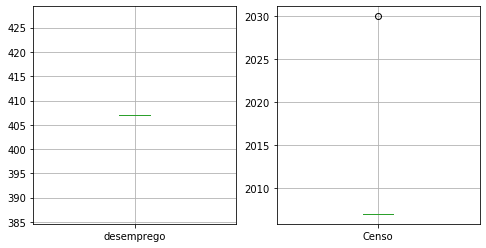

In [145]:
plt.figure(figsize=(8,4))
plt.subplot(121); desempregoout_std.boxplot(['desemprego'])
plt.subplot(122); censoout_std.boxplot(['Censo'])

In [146]:
censoout_std['Censo'].describe()

count       5.000000
mean     2011.600000
std        10.285913
min      2007.000000
25%      2007.000000
50%      2007.000000
75%      2007.000000
max      2030.000000
Name: Censo, dtype: float64

In [147]:
censoout_std.loc[censoout_std['Censo']> 2007, 'Censo']

2999    2030.0
Name: Censo, dtype: float64

In [148]:
desempregoout_std['desemprego'].describe()

count      1.0
mean     407.0
std        NaN
min      407.0
25%      407.0
50%      407.0
75%      407.0
max      407.0
Name: desemprego, dtype: float64

In [149]:
desempregoout_std.loc[desempregoout_std['desemprego'] >= 407, 'desemprego']

376    407.0
Name: desemprego, dtype: float64

### Questão 7)

Codifique uma funcão que preencha valores faltantes de variáveis numéricas utilizando a média condicionada (ou agrupada) a uma outra variável C da base. Essa funcao deverá: <br><br>
1. calcular a média da variável alvo A (a ser preenchida) relativa a (ou agrupada por) cada valor distinto da variável categórica selecionada C<br><br>
2. atribuir a média calculada de forma agrupada a todas as linhas cuja variável alvo é faltante e que possua o valor da variável categórica correspondente<br><br>
3. o valor atribuido deve seguir o mesmo tipo da variável alvo, ou seja, int, float, etc. Quando int, realize o arredondamento utlizando `np.round(,0)`, quando float64 utilize `np.round(,1)`
<br><br><br>
Use a funcão para preencher dados faltantes de desemprego condicionado a UF. Considerando arredondamento para 4 casas decimais, qual é a média da coluna desemprego para todas as linhas, antes e depois de realizar o preenchimento?

(a) antes: 6.6406, depois: 6.6423<br>
(b) antes: 6.6406, depois: 6.6406<br>
(c) antes: 6.6423, depois: 6.6406<br>
(d) antes: 6.6423, depois: 6.6423<br>

In [150]:
# verificando atributos faltantes
for var in data:
    # imprime variavel
    missvar = np.sum(data_nodup[var].isnull())
    if (missvar > 0):
        print(var,"- faltantes: ", missvar)

nome - faltantes:  2
Censo - faltantes:  5
PIB - faltantes:  1
PIB_percapita - faltantes:  4
desemprego - faltantes:  30


In [151]:
def missing_condmean(df, att, att_cat):
        
    dfn = df.copy()
    print('- preencher ', att, ' condicionado a ', att_cat, end=' : ')
    nullatt = dfn[att].isnull()
    print(np.sum(nullatt), 'faltantes')

    print('\t %s media antes = %.4f' % (att, df[att].mean()))
    for j in df[att_cat].unique():
        mu_cat = np.round(np.mean(df.loc[df[att_cat]==j, att]),4)
        
        if (df[att_cat].dtypes == np.int64):
            mu_cat = np.round(mu_cat,1)
            
        dfn.loc[(df[att].isnull()) & (df[att_cat]==j), att] = mu_cat
    
    print('\t %s media depois = %.4f' % (att, dfn[att].mean()))
        
    return dfn

In [154]:
data_fill = missing_condmean(data_nodup, 'desemprego', 'UF')

- preencher  desemprego  condicionado a  UF : 30 faltantes
	 desemprego media antes = 6.6406
	 desemprego media depois = 6.6422


### Questão 8)

Considere o atributo 'classe' apenas para a UF 'Rio de Janeiro' e analise a distribuicao dos seus valores.

Para executar um algoritmo de aprendizado em que a o atributo alvo é 'classe', qual seria a abordagem mais indicada:

(a) considerar cenário desbalanceado com 2 classes minoritárias e estudar medidas para compensar esse desbalanceamento<br>
(b) realizar análise com os dados originais, mesmo desbalanceados<br>
(c) considerar cenário desbalanceado com 1 classes minoritárias e estudar medidas para compensar esse desbalanceamento<br>
(d) considerar cenário desbalanceado com 4 classes minoritárias e estudar medidas para compensar esse desbalanceamento<br>

(array([ 991., 1323.,  328.,  943.,  201.,  492.,  450.,  501.,  267.,
          69.]),
 array([ 0. ,  2.6,  5.2,  7.8, 10.4, 13. , 15.6, 18.2, 20.8, 23.4, 26. ]),
 <a list of 10 Patch objects>)

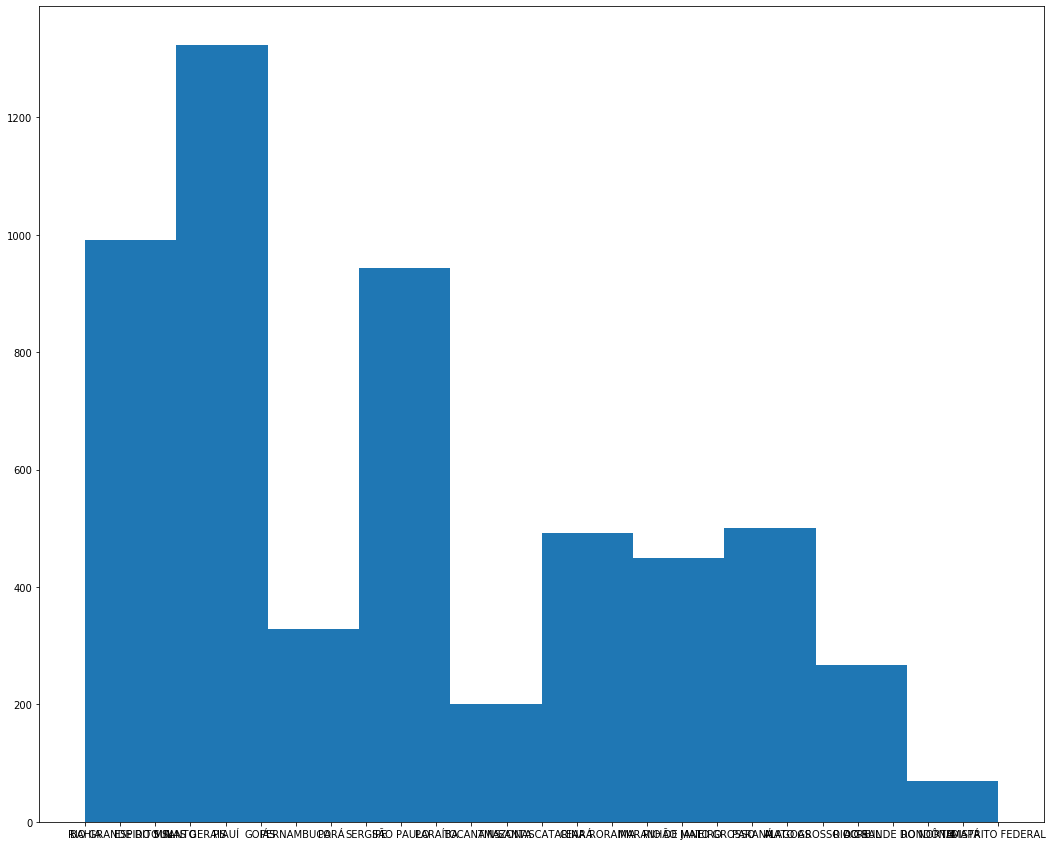

In [170]:
plt.figure(figsize=(18, 15))
plt.hist(data_nodup['UF'])

In [164]:
dat_nodup.groupby('UF').count().sort_values('UF')

,gid,nome,Censo,PIB,Pop_est_2009,PIB_percapita,Descrição,classe,desemprego
UF,,,,,,,,,
ACRE,22,22,22,22,22,22,22,22,22
ALAGOAS,102,102,102,102,102,102,102,102,102
AMAPÁ,16,16,16,16,16,16,16,16,16
AMAZONAS,62,62,62,62,62,62,62,62,62
BAHIA,417,417,416,417,417,417,417,417,417
CEARÁ,184,184,184,184,184,183,184,184,184
DISTRITO FEDERAL,1,1,1,1,1,1,1,1,1
ESPIRITO SANTO,78,78,78,78,78,77,78,78,78
GOIÁS,246,246,246,246,246,246,246,246,246


In [167]:
np.random.seed(2)

n_train = np.round(data_nodup.shape[0]*0.80)
print(n_train)
indices_train = np.random.rand(data_nodup.shape[0]) < 0.8
dtrain = data_nodup[indices_train]
dtest = data_nodup[~indices_train]

4452.0


array([ True,  True,  True, ...,  True,  True,  True])

In [ ]:
# Treinando classificador
X = dtrain[['tax','insurance', 'hoa']]
Y = dtrain['UF']

ZX = dtest[['tax','insurance', 'hoa']]
ZY = dtest['UF']

clf = SVC(gamma='auto')
clf.fit(X,Y)
ZY_ = clf.predict(ZX)

### Questão 1)
 
Considerando a limpeza inicial realizada, quais variáveis possuiam valores que precisaram ser padronizados ou corrigidos de forma a não causar perda de dados e/ou inconsistências
 
(a) UF, Desemprego, Censo, gid e nome<br>
(b) UF, Desemprego, Censo<br>
(c) UF e gid<br>
(d) UF e Censo<br>

---

### Questão 2)

Após verificar duplicatas, quantas linhas foram removidas?

(a) 5<br>
(b) 3<br>
(c) 4<br>
(d) 6<br>


---

### Questão 3)

Das 11 colunas iniciais, havia alguma identificada como irrelevante e que foi removida?

(a) não<br>
(b) sim: as colunas 1 e 9 <br>
(b) sim: a coluna 9 <br>
(d) sim: a coluna 1, 2 e 9 <br>


---
### Questão 4)

Vamos analisar possíveis outliers. Utilize o método da análise da dispersão pelo desvio padrão e inspecione as colunas 'gid', 'Censo', 'PIB', 'Pop_est_2009', 'desemprego', procurando por outliers globais com critério de 2 desvios padrões, i.e. $2\sigma$.

Quantos outliers foram encontrados, respectivamente, para 'gid', 'Censo', 'PIB', 'Pop_est_2009' e 'desemprego'?

(a) 0, 0, 1, 5, 27<br>
(b) 0, 5, 9, 44, 1 <br>
(c) 0, 5, 5, 27, 1 <br>
(d) 0, 5, 5, 44, 2 <br>

### Questão 5)

Analisando os outliers retornados em 'Censo' e 'desemprego' na questão anterior, quantos valores respectivamente, parecem ser outliers globais verdadeiros e para os quais se recomenda remover o valor antes de qualquer análise posterior?

(a) 5, 0<br>
(b) 0, 1<br>
(c) 5, 1<br>
(d) 1,1 <br>

---

### Questão 6)

Utilize a base de dados após a limpeza inicial (sem remover outliers). Imprima o total de valores faltantes em cada variável.

Quais variáveis possuem valores faltantes e em qual número?

(a) nome:  2, Censo:  6, PIB:  1, PIB_percapita:  4, desemprego:  30<br>
(b) nome:  1, Censo:  6, PIB_percapita:  4, desemprego:  30<br>
(c) nome:  2, Censo:  7, PIB:  1, PIB_percapita:  4, desemprego:  30<br>
(d) nome:  2, Censo:  6, PIB_percapita:  4, desemprego:  30<br>


---

### Questão 7)

Codifique uma funcão que preencha valores faltantes de variáveis numéricas utilizando a média condicionada (ou agrupada) a uma outra variável C da base. Essa funcao deverá:
1. calcular a média da variável alvo A (a ser preenchida) relativa a (ou agrupada por) cada valor distinto da variável categórica selecionada C
2. atribuir a média calculada de forma agrupada a todas as linhas cuja variável alvo é faltante e que possua o valor da variável categórica correspondente
3. o valor atribuido deve seguir o mesmo tipo da variável alvo, ou seja, int, float, etc. Quando int, realize o arredondamento utlizando `np.round(,0)`, quando float64 utilize `np.round(,1)`

Use a funcão para preencher dados faltantes de desemprego condicionado a UF. Considerando arredondamento para 4 casas decimais, qual é a média da coluna desemprego para todas as linhas, antes e depois de realizar o preenchimento?

(a) antes: 6.6406, depois: 6.6423<br>
(b) antes: 6.6406, depois: 6.6406<br>
(c) antes: 6.6423, depois: 6.6406<br>
(d) antes: 6.6423, depois: 6.6423<br>


---

### Questão 8)

Considere o atributo 'classe' apenas para a UF 'Rio de Janeiro' e analise a distribuicao dos seus valores.

Para executar um algoritmo de aprendizado em que a o atributo alvo é 'classe', qual seria a abordagem mais indicada:

(a) considerar cenário desbalanceado com 2 classes minoritárias e estudar medidas para compensar esse desbalanceamento<br>
(b) realizar análise com os dados originais, mesmo desbalanceados<br>
(c) considerar cenário desbalanceado com 1 classes minoritárias e estudar medidas para compensar esse desbalanceamento<br>
(d) considerar cenário desbalanceado com 4 classes minoritárias e estudar medidas para compensar esse desbalanceamento<br>